# NLP Final Project - Sentiment Analysis (Entity)

For this final project, there is a collection of ~200K news articles on our favorite topics, data science, machine learning, and artificial intelligence. Our task is to identify what industries and job lines are going to be most impacted by AI over the next several years, based on the information/insights you can extract from this text corpus.

Goal: provide actionable recommendations on what can be done with AI to automate the jobs, improve employee productivity, and generally make AI adoption successful. Please pay attention to the introduction of novel technologies and algorithms, such as AI for image generation and Conversational AI, as they represent the entire paradigm shift in adoption of AI technologies and data science in general.


In [2]:
import pandas as pd
import re

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# file_path = '/content/drive/My Drive/nlp_final/final.csv'

df = pd.read_csv('final.csv', escapechar='\\', index_col=0)

# Display loaded data
df.head()

,date,cleaned_text,topic,predicted_sentiment
0,2020-01-28,aucklandscoopconz AUT boosts AI expertise wi...,Topic 8,positive
1,2021-07-05,Observation Simulation And AI Join Forces To ...,Topic 5,positive
2,2020-06-23,Applitools Visual AI Reaches One Billion Imag...,Topic 6,positive
3,2020-12-24,Data Science and MachineLearning Platforms Ma...,Topic 17,neutral
4,2022-10-06,Healthcare Artificial Intelligence Market Ana...,Topic 17,positive


In [10]:
# !pip install spacy
# !python -m spacy downl`oad en_core_web_lg


In [11]:
import spacy

# Load the SpaCy language model
nlp = spacy.load('en_core_web_lg')

## sample

In [9]:
sampled_df = df.sample(frac=0.4, random_state=42)


In [10]:
import spacy

# Load SpaCy's English NER model
nlp = spacy.load("en_core_web_lg")


In [11]:
# Function to extract entities using SpaCy
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [12]:
# Apply NER to each cleaned_text
sampled_df['entities'] = sampled_df['cleaned_text'].apply(extract_entities)
sampled_df.head()

,date,cleaned_text,topic,predicted_sentiment,entities
4511,2024-04-09,Bill Gates Worries AI Will Take His Job Says M...,Topic 1,neutral,"[(Bill Gates Worries, PERSON), (Trending Ticke..."
3722,2022-10-13,Data analytics and AI are expected to be the t...,Topic 17,positive,"[(AI, ORG), (fintech, ORG), (Mastercard, ORG),..."
6152,2024-01-19,Poliark Launches New AI 3D Modeling Platform ...,Topic 7,positive,"[(AltEnergyMag, ORG), (Entire Site Articles Ne..."
5121,2022-06-30,VistaPath Raises 4M to Modernize Pathology Lab...,Topic 13,positive,"[(VistaPath Raises 4M, PRODUCT), (Modernize Pa..."
1569,2022-11-11,Dentists using AI that finds even more caviti...,Topic 18,positive,"[(AI, ORG), (KTLA Skip, ORG), (KTLA Los Angele..."


In [30]:
df_exploded = sampled_df.explode('entities')


In [31]:
# Split the entities column into separate entity and type columns
df_exploded[['entity', 'entity_type']] = pd.DataFrame(df_exploded['entities'].tolist(), index=df_exploded.index)


In [32]:
# Drop the original entities column
df_exploded = df_exploded.drop(columns=['entities'])
df_exploded[:10]

,date,cleaned_text,topic,predicted_sentiment,entity,entity_type
4511,2024-04-09,Bill Gates Worries AI Will Take His Job Says M...,Topic 1,neutral,Bill Gates Worries,PERSON
4511,2024-04-09,Bill Gates Worries AI Will Take His Job Says M...,Topic 1,neutral,Trending Tickers Stocks,WORK_OF_ART
4511,2024-04-09,Bill Gates Worries AI Will Take His Job Says M...,Topic 1,neutral,Goodbye FA Corner Yahoo Finance Plus Dashboard...,ORG
4511,2024-04-09,Bill Gates Worries AI Will Take His Job Says M...,Topic 1,neutral,Cashback cards Travel cards Rewards cards Bank...,ORG
4511,2024-04-09,Bill Gates Worries AI Will Take His Job Says M...,Topic 1,neutral,4 hours,TIME
4511,2024-04-09,Bill Gates Worries AI Will Take His Job Says M...,Topic 1,neutral,5005177462493,CARDINAL
4511,2024-04-09,Bill Gates Worries AI Will Take His Job Says M...,Topic 1,neutral,048,CARDINAL
4511,2024-04-09,Bill Gates Worries AI Will Take His Job Says M...,Topic 1,neutral,Dow 30386780021480,ORG
4511,2024-04-09,Bill Gates Worries AI Will Take His Job Says M...,Topic 1,neutral,055,CARDINAL
4511,2024-04-09,Bill Gates Worries AI Will Take His Job Says M...,Topic 1,neutral,Nasdaq16196425753 035,ORG


In [33]:
filtered_df = df_exploded[df_exploded['entity_type'].isin(['PERSON', 'ORG', 'PRODUCT'])]


In [34]:
filtered_df

,date,cleaned_text,topic,predicted_sentiment,entity,entity_type
4511,2024-04-09,Bill Gates Worries AI Will Take His Job Says M...,Topic 1,neutral,Bill Gates Worries,PERSON
4511,2024-04-09,Bill Gates Worries AI Will Take His Job Says M...,Topic 1,neutral,Goodbye FA Corner Yahoo Finance Plus Dashboard...,ORG
4511,2024-04-09,Bill Gates Worries AI Will Take His Job Says M...,Topic 1,neutral,Cashback cards Travel cards Rewards cards Bank...,ORG
4511,2024-04-09,Bill Gates Worries AI Will Take His Job Says M...,Topic 1,neutral,Dow 30386780021480,ORG
4511,2024-04-09,Bill Gates Worries AI Will Take His Job Says M...,Topic 1,neutral,Nasdaq16196425753 035,ORG
...,...,...,...,...,...,...
1018,2022-08-08,OmahaBased MRI Medical Device Company Bot Imag...,Topic 4,positive,VideosKSFYKDLT325,ORG
1018,2022-08-08,OmahaBased MRI Medical Device Company Bot Imag...,Topic 4,positive,ServicePrivacy PolicyEEO,ORG
1018,2022-08-08,OmahaBased MRI Medical Device Company Bot Imag...,Topic 4,positive,CaptioningAudio,ORG
1018,2022-08-08,OmahaBased MRI Medical Device Company Bot Imag...,Topic 4,positive,ApplicationsA Gray Media Group Inc Station,ORG


### Entity Sentiment for Topic 4

In [45]:
topic_4 = filtered_df[filtered_df['topic'].isin(['Topic 4'])]
topic_4

,date,cleaned_text,topic,predicted_sentiment,entity,entity_type
6356,2023-01-04,MayaMDs Pioneering AI Healthcare Platform Soli...,Topic 4,positive,Pioneering AI Healthcare Platform Solidifies L...,ORG
6356,2023-01-04,MayaMDs Pioneering AI Healthcare Platform Soli...,Topic 4,positive,InvestigatesWatch LiveLatest VideoWeatherRadar...,ORG
6356,2023-01-04,MayaMDs Pioneering AI Healthcare Platform Soli...,Topic 4,positive,ZoneSpotlight,PRODUCT
6356,2023-01-04,MayaMDs Pioneering AI Healthcare Platform Soli...,Topic 4,positive,ConversationsHometown HeroNominate,ORG
6356,2023-01-04,MayaMDs Pioneering AI Healthcare Platform Soli...,Topic 4,positive,VacationsCircle Country Music,ORG
...,...,...,...,...,...,...
1018,2022-08-08,OmahaBased MRI Medical Device Company Bot Imag...,Topic 4,positive,VideosKSFYKDLT325,ORG
1018,2022-08-08,OmahaBased MRI Medical Device Company Bot Imag...,Topic 4,positive,ServicePrivacy PolicyEEO,ORG
1018,2022-08-08,OmahaBased MRI Medical Device Company Bot Imag...,Topic 4,positive,CaptioningAudio,ORG
1018,2022-08-08,OmahaBased MRI Medical Device Company Bot Imag...,Topic 4,positive,ApplicationsA Gray Media Group Inc Station,ORG


In [36]:
sentiment_counts = topic_4.groupby(['entity_type', 'predicted_sentiment']).size().unstack(fill_value=0)


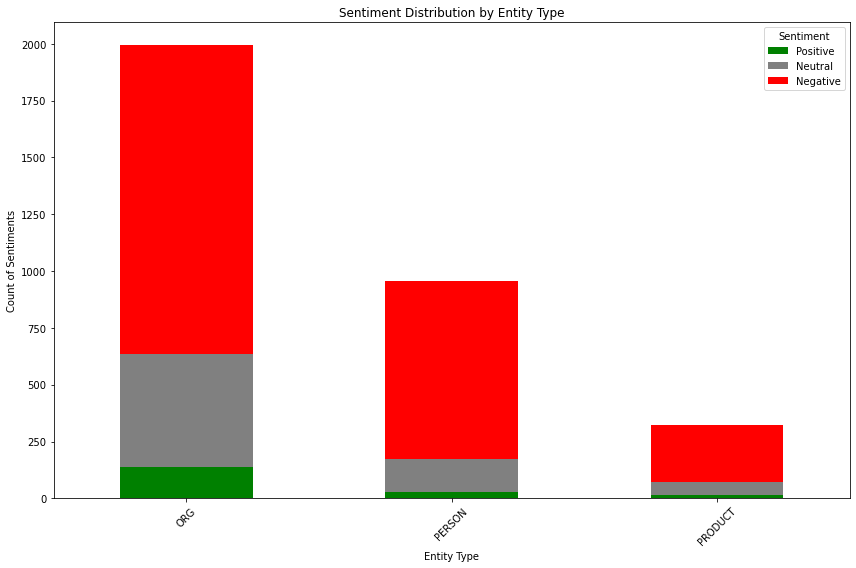

In [37]:
import matplotlib.pyplot as plt

#Plotting
sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=['green', 'gray', 'red'])

# Add labels and title
plt.xlabel('Entity Type')
plt.ylabel('Count of Sentiments')
plt.title('Sentiment Distribution by Entity Type')
plt.legend(title='Sentiment', labels=['Positive', 'Neutral', 'Negative'])
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [49]:
topic_4 = topic_4[topic_4['entity'].notna()]

# Strip whitespace from entity names
topic_4['entity'] = topic_4['entity'].str.strip()

topic_4['entity'] = topic_4['entity'].apply(lambda x: x if len(x) <= 40 else x[:25] + '...')


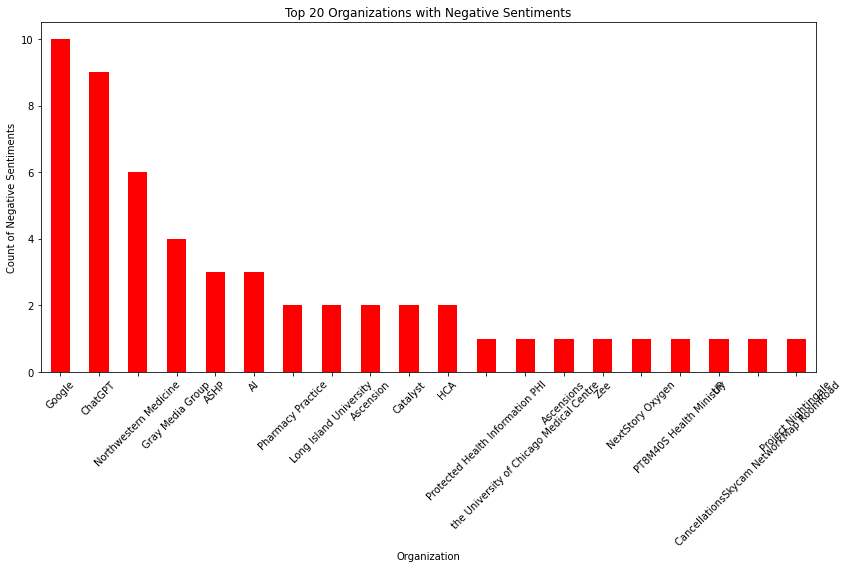

In [50]:
# Filter data for negative sentiment and entity type 'ORG'
negative_orgs = topic_4[(topic_4['predicted_sentiment'] == 'negative') & (topic_4['entity_type'] == 'ORG')]

# Get the first 20 organizations
top_negative_orgs = negative_orgs['entity'].value_counts().head(20)

# Plotting
plt.figure(figsize=(12, 8))
top_negative_orgs.plot(kind='bar', color='red')

# Add labels and title
plt.xlabel('Organization')
plt.ylabel('Count of Negative Sentiments')
plt.title('Top 20 Organizations with Negative Sentiments')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [55]:
# Set pandas options to display all rows and all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [56]:
filtered_topic_4 = topic_4[topic_4['entity'].isin(['Google', 'ChatGPT'])]
filtered_topic_4 = filtered_topic_4.drop_duplicates()
filtered_topic_4

date  \
3245  2023-12-05   
1443  2021-05-27   
1919  2023-04-30   
297   2020-06-08   
4124  2023-05-17   
3190  2020-05-12   
3296  2023-09-19   
293   2023-08-21   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## On Full Dataset

In [12]:
# Function to extract entities using SpaCy
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [ ]:
# Apply NER to each cleaned_text
df['entities'] = df['cleaned_text'].apply(extract_entities)
df.head()

In [ ]:
df_exploded = df.explode('entities')


In [ ]:
# Split the entities column into separate entity and type columns
df_exploded[['entity', 'entity_type']] = pd.DataFrame(df_exploded['entities'].tolist(), index=df_exploded.index)


In [ ]:
# Drop the original entities column
df_exploded = df_exploded.drop(columns=['entities'])
df_exploded[:10]

In [ ]:
filtered_df = df_exploded[df_exploded['entity_type'].isin(['PERSON', 'ORG', 'PRODUCT'])]


### Entity Sentiment for Topic 4

In [45]:
topic_4 = filtered_df[filtered_df['topic'].isin(['Topic 4'])]
topic_4

,date,cleaned_text,topic,predicted_sentiment,entity,entity_type
6356,2023-01-04,MayaMDs Pioneering AI Healthcare Platform Soli...,Topic 4,positive,Pioneering AI Healthcare Platform Solidifies L...,ORG
6356,2023-01-04,MayaMDs Pioneering AI Healthcare Platform Soli...,Topic 4,positive,InvestigatesWatch LiveLatest VideoWeatherRadar...,ORG
6356,2023-01-04,MayaMDs Pioneering AI Healthcare Platform Soli...,Topic 4,positive,ZoneSpotlight,PRODUCT
6356,2023-01-04,MayaMDs Pioneering AI Healthcare Platform Soli...,Topic 4,positive,ConversationsHometown HeroNominate,ORG
6356,2023-01-04,MayaMDs Pioneering AI Healthcare Platform Soli...,Topic 4,positive,VacationsCircle Country Music,ORG
...,...,...,...,...,...,...
1018,2022-08-08,OmahaBased MRI Medical Device Company Bot Imag...,Topic 4,positive,VideosKSFYKDLT325,ORG
1018,2022-08-08,OmahaBased MRI Medical Device Company Bot Imag...,Topic 4,positive,ServicePrivacy PolicyEEO,ORG
1018,2022-08-08,OmahaBased MRI Medical Device Company Bot Imag...,Topic 4,positive,CaptioningAudio,ORG
1018,2022-08-08,OmahaBased MRI Medical Device Company Bot Imag...,Topic 4,positive,ApplicationsA Gray Media Group Inc Station,ORG


In [36]:
sentiment_counts = topic_4.groupby(['entity_type', 'predicted_sentiment']).size().unstack(fill_value=0)


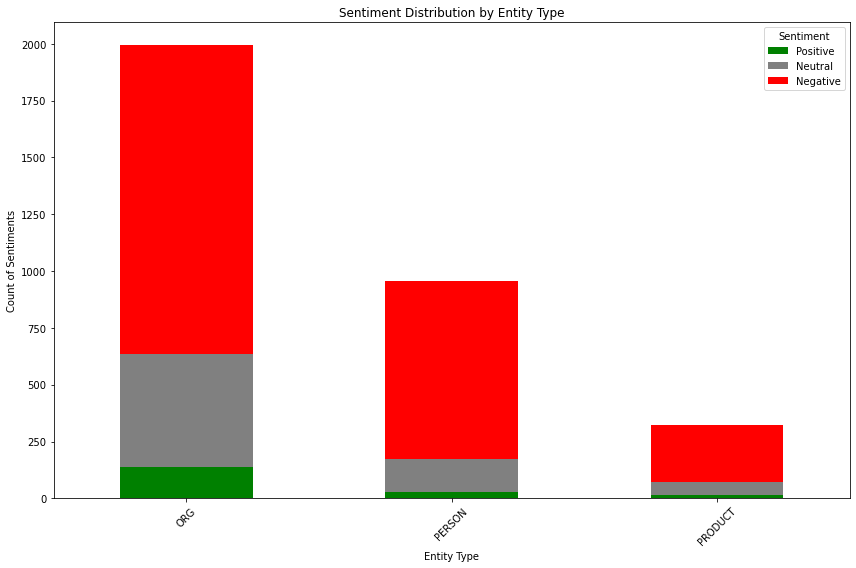

In [37]:
import matplotlib.pyplot as plt

#Plotting
sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=['green', 'gray', 'red'])

# Add labels and title
plt.xlabel('Entity Type')
plt.ylabel('Count of Sentiments')
plt.title('Sentiment Distribution by Entity Type')
plt.legend(title='Sentiment', labels=['Positive', 'Neutral', 'Negative'])
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [49]:
topic_4 = topic_4[topic_4['entity'].notna()]

# Strip whitespace from entity names
topic_4['entity'] = topic_4['entity'].str.strip()

topic_4['entity'] = topic_4['entity'].apply(lambda x: x if len(x) <= 40 else x[:25] + '...')


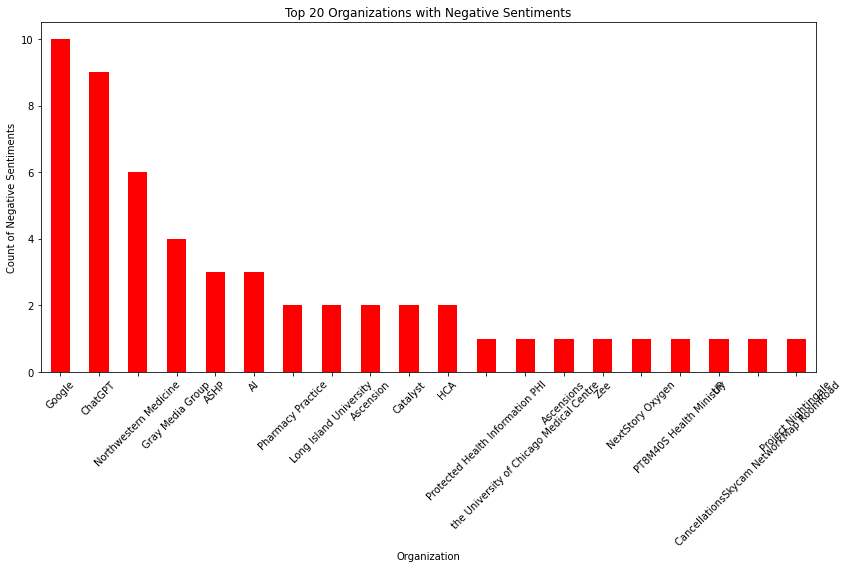

In [50]:
# Filter data for negative sentiment and entity type 'ORG'
negative_orgs = topic_4[(topic_4['predicted_sentiment'] == 'negative') & (topic_4['entity_type'] == 'ORG')]

# Get the first 20 organizations
top_negative_orgs = negative_orgs['entity'].value_counts().head(20)

# Plotting
plt.figure(figsize=(12, 8))
top_negative_orgs.plot(kind='bar', color='red')

# Add labels and title
plt.xlabel('Organization')
plt.ylabel('Count of Negative Sentiments')
plt.title('Top 20 Organizations with Negative Sentiments')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [55]:
# Set pandas options to display all rows and all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [56]:
filtered_topic_4 = topic_4[topic_4['entity'].isin(['Google', 'ChatGPT'])]
filtered_topic_4 = filtered_topic_4.drop_duplicates()
filtered_topic_4

date  \
3245  2023-12-05   
1443  2021-05-27   
1919  2023-04-30   
297   2020-06-08   
4124  2023-05-17   
3190  2020-05-12   
3296  2023-09-19   
293   2023-08-21   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       